# Comparing time differences

In [1]:
import pickle 

# Step 1: Load selected_feature_data
with open("Data/selected_feature_data_simulated.pkl", "rb") as f:
    selected_feature_data = pickle.load(f)

In [2]:
import pandas as pd

# Initialize result dictionary
time_summary = {}

# Loop through each dataset
for dataset_name, inner_dict in selected_feature_data.items():
    total_time = 0.0
    for k, result in inner_dict.items():
        # Accumulate time if 'time' key exists
        if 'time' in result:
            total_time += result['time']
    time_summary[dataset_name] = total_time

# Convert to DataFrame
df_time_summary = pd.DataFrame.from_dict(time_summary, orient='index', columns=['Total_Time'])
df_time_summary.index.name = 'Dataset'
df_time_summary.reset_index(inplace=True)

# Display result
print(df_time_summary)


    Dataset  Total_Time
0    sim_10    0.163737
1    sim_20    0.540939
2    sim_30    1.209208
3    sim_40    2.097278
4    sim_50    3.350169
5    sim_60    4.952726
6    sim_70    9.903513
7    sim_80   20.486679
8    sim_90   25.701540
9   sim_100   24.470067
10  sim_110   42.419664
11  sim_120   50.858460
12  sim_130   49.758826
13  sim_140   53.552553
14  sim_150   63.234214
15  sim_160   61.925615
16  sim_170   57.017297
17  sim_180   40.841210
18  sim_190   53.061078
19  sim_200   48.128952
20  sim_210   56.327405
21  sim_220   63.645427
22  sim_230   65.045604
23  sim_240   75.803768
24  sim_250   96.694072
25  sim_260   90.375733
26  sim_270  105.499588
27  sim_280  164.064655
28  sim_290  145.857420
29  sim_300   99.287280
30  sim_310  168.473095
31  sim_320  118.295507
32  sim_330  187.406970
33  sim_340  128.148572
34  sim_350  197.584889
35  sim_360  263.356475
36  sim_370  285.468011
37  sim_380  299.662633
38  sim_390  312.226191
39  sim_400  260.113539
40  sim_410  281

Time difference

In [15]:
(504.853970-281.190890)/(24.470067-0.163737)

9.201844951500288

Removing the sim part

In [8]:
df_time_summary['Dataset'] = df_time_summary['Dataset'].str.replace('sim_', '', regex=False)

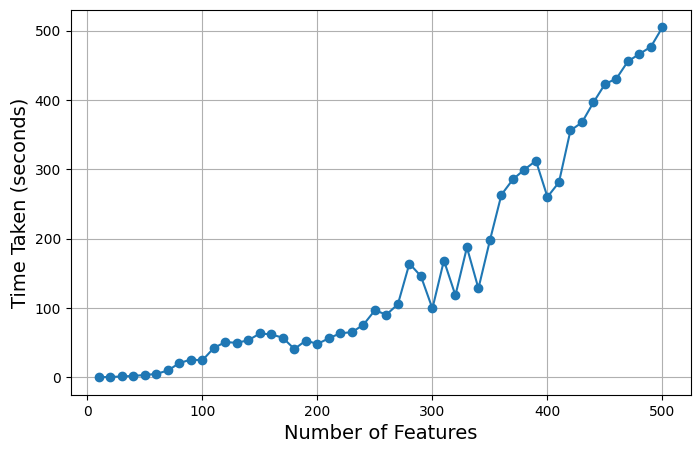

In [14]:
import matplotlib.pyplot as plt

# Convert columns to correct types
df_time_summary['Dataset'] = df_time_summary['Dataset'].astype(int)  # Number of features
df_time_summary['Total_Time'] = df_time_summary['Total_Time'].astype(float)  # Time taken

# Sort by number of features for cleaner plotting
df_time_summary = df_time_summary.sort_values('Dataset')

# Plot
plt.figure(figsize=(8, 5))
plt.plot(df_time_summary['Dataset'], df_time_summary['Total_Time'], marker='o')
plt.xlabel('Number of Features',fontsize=14)
plt.ylabel('Time Taken (seconds)',fontsize=14)
plt.grid(True)
# Save to PDF (this must come before plt.show())
plt.savefig("total_time_vs_dataset.pdf", format='pdf')
plt.show()
